In [73]:
#import libaries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.

In [74]:
#import data 
datafile=pd.read_csv('heart.csv')
print(datafile.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [75]:
#read data detail
datafile.head()
print(datafile.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [76]:
#data cleaning check
datafile.duplicated()
print(datafile.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool


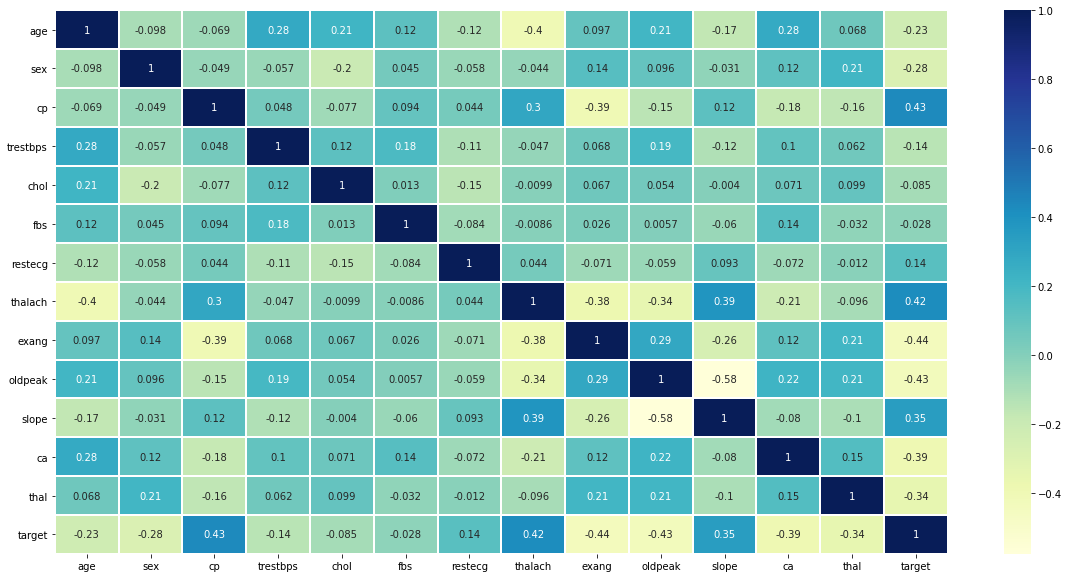

In [77]:
#explore the correlation
plt.figure(figsize=(20,10))
sns.heatmap(datafile.corr(), annot=True, cmap="YlGnBu", linewidths=1)
plt.show()

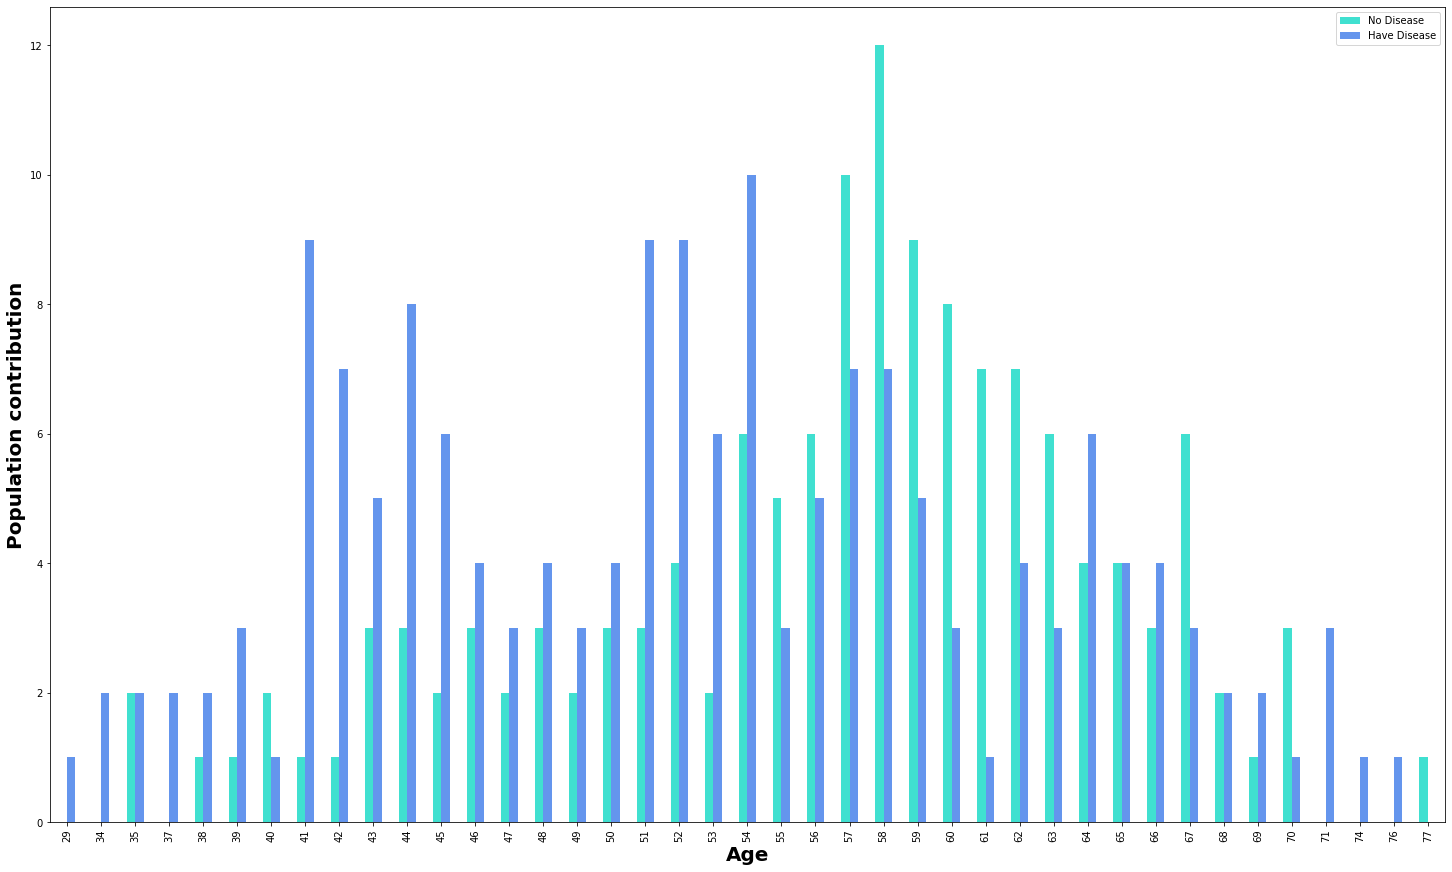

In [78]:
#explore different ages and heart disease number
pd.crosstab(datafile.age, datafile.target).plot(kind="bar", figsize=(25, 15), color=['turquoise', 'cornflowerblue'])
plt.xlabel('Age',fontsize=20, fontweight='bold')
plt.ylabel('Population contribution',fontsize=20, fontweight='bold')
plt.legend(["No Disease", "Have Disease"])
plt.show()

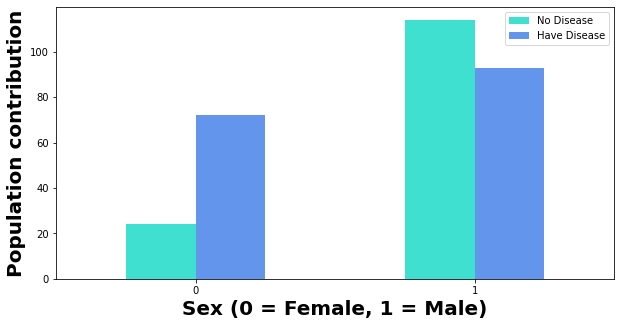

In [79]:
#explore different gender and heart disease number
pd.crosstab(datafile.sex, datafile.target).plot(kind="bar", figsize=(10, 5), color=['turquoise', 'cornflowerblue'])
plt.xlabel('Sex (0 = Female, 1 = Male)',fontsize=20, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Population contribution',fontsize=20, fontweight='bold')
plt.show()

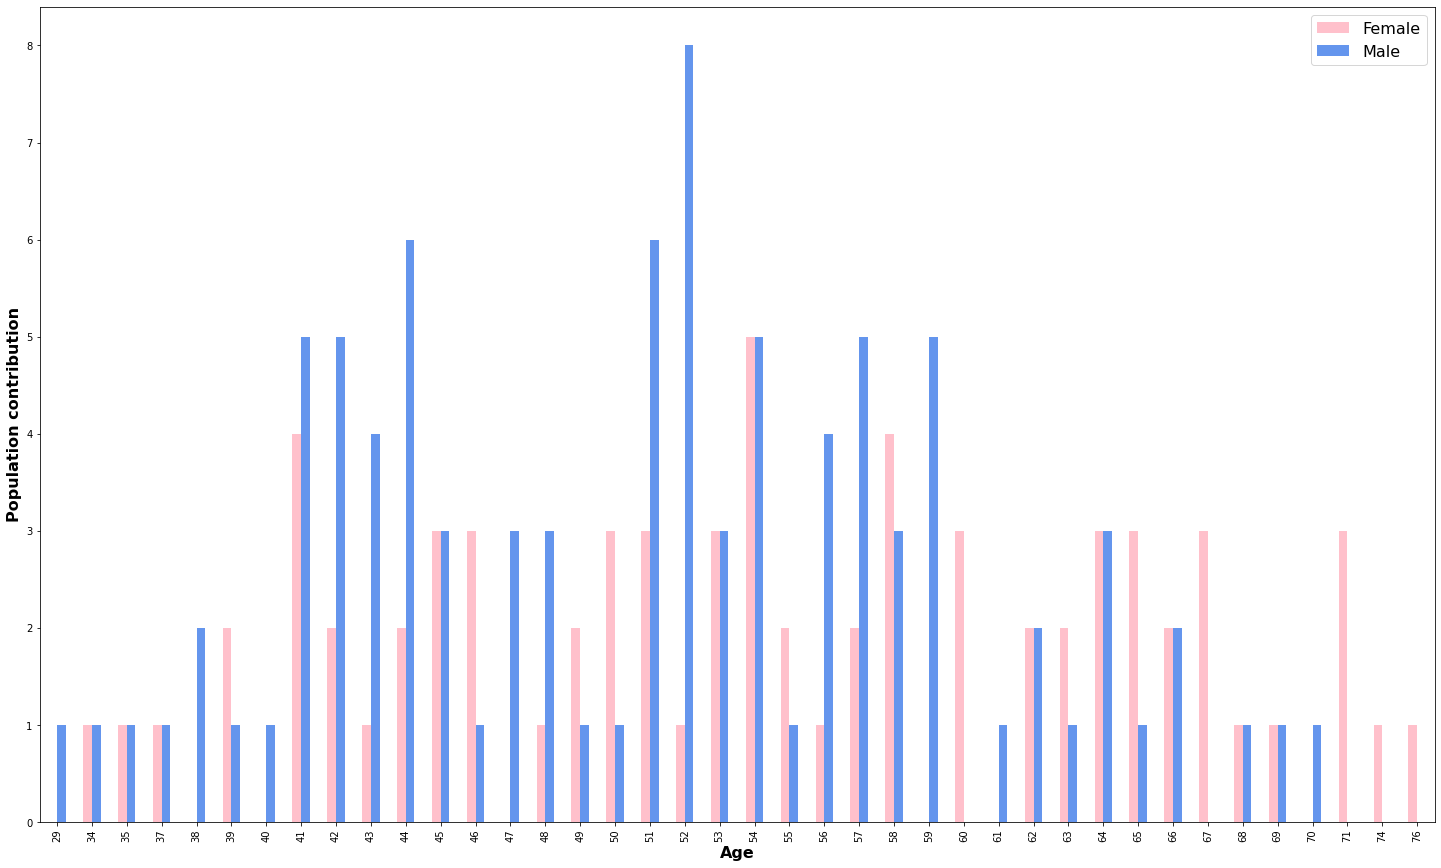

In [80]:
#explore different gender number in different age who have heart disease
x=datafile.age[datafile.target == 1]
pd.crosstab(x, datafile.sex, ).plot(kind="bar", figsize=(25, 15), color=['pink', 'cornflowerblue'])
plt.xlabel('Age',fontsize=16, fontweight='bold')
plt.legend(['Female', 'Male'],fontsize=16)
plt.ylabel('Population contribution',fontsize=16, fontweight='bold')
plt.show()

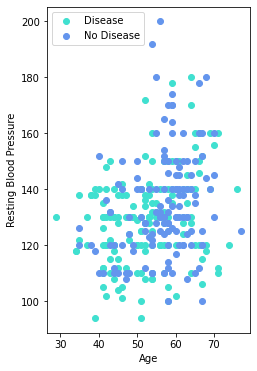

In [81]:
#explore the the person's resting blood pressure based on age
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.scatter(x=datafile.age[datafile.target==1],y=datafile.trestbps[datafile.target==1],c='turquoise')
plt.scatter(x=datafile.age[datafile.target==0],y=datafile.trestbps[datafile.target==0],c='cornflowerblue')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

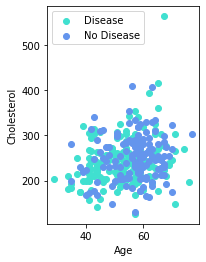

In [82]:
#explore the the person's cholesterol measurement based on age
plt.subplot(1,2,2)
plt.scatter(x=datafile.age[datafile.target==1],y=datafile.chol[datafile.target==1],c='turquoise')
plt.scatter(x=datafile.age[datafile.target==0],y=datafile.chol[datafile.target==0],c= 'cornflowerblue')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])
plt.show()

In [83]:
#import libaries
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   63    1       145   233    1      150      0      2.3   0       1  ...   
1   37    1       130   250    0      187      0      3.5   0       1  ...   
2   41    0       130   204    0      172      0      1.4   0       1  ...   
3   56    1       120   236    0      178      0      0.8   0       1  ...   
4   57    0       120   354    0      163      1      0.6   0       1  ...   

   slope_0  slope_1  slope_2  thal_0  thal_1  thal_2  thal_3  restecg_0  \
0        1        0        0       0       1       0       0          1   
1        1        0        0       0       0       1       0          0   
2        0        0        1       0       0       1       0          1   
3        0        0        1       0       0       1       0          0   
4        0        0        1       0       0       1       0          0   

   restecg_1  restecg_2  
0          0          0  
1          1          0  
2 

/Users/zhangjiali/PycharmProjects/heart-disease/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=22, units=11, kernel_initializer="uniform")`
/Users/zhangjiali/PycharmProjects/heart-disease/venv/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
/Users/zhangjiali/PycharmProjects/heart-disease/venv/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/Users/zhangjiali/PycharmProjects/heart-disease/venv/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
242/242 [==============================] - 0s 574us/step - loss: 0.6928 - accuracy: 0.5372
Epoch 2/100
242/242 [==============================] - 0s 105us/step - loss: 0.6880 - accuracy: 0.6570
Epoch 3/100
242/242 [==============================] - 0s 96us/step - loss: 0.6693 - accuracy: 0.8264
Epoch 4/100
242/242 [==============================] - 0s 109us/step - loss: 0.6244 - accuracy: 0.8306
Epoch 5/100
242/242 [==============================] - 0s 87us/step - loss: 0.5471 - accuracy: 0.8264
Epoch 6/100
242/242 [==============================] - 0s 96us/step - loss: 0.4630 - accuracy: 0.8264
Epoch 7/100
242/242 [==============================] - 0s 82us/step - loss: 0.4076 - accuracy: 0.8306
Epoch 8/100
242/242 [==============================] - 0s 87us/step - loss: 0.3799 - accuracy: 0.8347
Epoch 9/100
242/242 [==============================] - 0s 83us/step - loss: 0.3660 - accuracy: 0.8471
Epoch 10/100
242/242 [==============================] - 0s 80us/step - loss: 0.

242/242 [==============================] - 0s 92us/step - loss: 0.2146 - accuracy: 0.9132
Epoch 81/100
242/242 [==============================] - 0s 81us/step - loss: 0.2119 - accuracy: 0.9174
Epoch 82/100
242/242 [==============================] - 0s 90us/step - loss: 0.2098 - accuracy: 0.9215
Epoch 83/100
242/242 [==============================] - 0s 89us/step - loss: 0.2067 - accuracy: 0.9174
Epoch 84/100
242/242 [==============================] - 0s 92us/step - loss: 0.2072 - accuracy: 0.9132
Epoch 85/100
242/242 [==============================] - 0s 88us/step - loss: 0.2030 - accuracy: 0.9215
Epoch 86/100
242/242 [==============================] - 0s 90us/step - loss: 0.2000 - accuracy: 0.9256
Epoch 87/100
242/242 [==============================] - 0s 79us/step - loss: 0.1980 - accuracy: 0.9174
Epoch 88/100
242/242 [==============================] - 0s 89us/step - loss: 0.1967 - accuracy: 0.9215
Epoch 89/100
242/242 [==============================] - 0s 86us/step - loss: 0.1957 - 

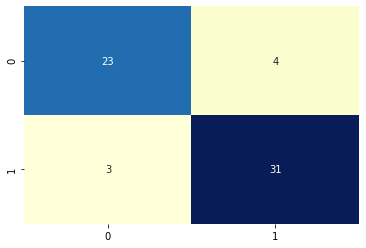

In [84]:
#Creating dummy variables
chest_pain=pd.get_dummies(datafile['cp'], prefix='cp', drop_first=True)
datafile=pd.concat([datafile, chest_pain], axis=1)
datafile.drop(['cp'], axis=1, inplace=True)
sp=pd.get_dummies(datafile['slope'], prefix='slope')
th=pd.get_dummies(datafile['thal'], prefix='thal')
rest_ecg=pd.get_dummies(datafile['restecg'], prefix='restecg')
frames=[datafile, sp, th, rest_ecg]
datafile=pd.concat(frames, axis=1)
datafile.drop(['slope', 'thal', 'restecg'], axis=1, inplace=True)
datafile.head()
print(datafile.head())

#split the features and tartget values and preparing for leaning
X = datafile.drop(['target'], axis = 1)
print(X)
y = datafile.target.values
print(y)

#create train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Create neural network model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(output_dim = 11, init ='uniform', activation ='relu', input_dim = 22))

# Adding the third hidden layer
model.add(Dense(output_dim = 11, init ='uniform', activation ='relu'))

# Adding the output layer
model.add(Dense(output_dim = 1, init ='uniform', activation ='sigmoid'))

# Compiling the ANN
model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics = ['accuracy'])

# Choose the number of epochs
model.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)
# Predicting the Test set results
y_pred = model.predict(X_test)
# print(y_pred)
# print(y_pred.round())

# heatmap accurancy
nncm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(nncm, annot=True, cmap="YlGnBu", fmt="d", cbar=False)

In [85]:
#Neural network accuracy score
from sklearn.metrics import accuracy_score
nn_ac=accuracy_score(y_test, y_pred.round())
print('NeuralNetwork_accuracy:', nn_ac)
plt.show()

NeuralNetwork_accuracy: 0.8852459016393442


RandomForest Accuracy: 0.8032786885245902


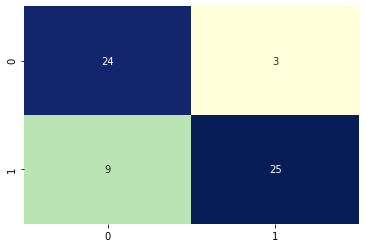

In [86]:
# Create random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf_c=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_c.fit(X_train, y_train)
rf_pred=rf_c.predict(X_test)
rf_cm=confusion_matrix(y_test, rf_pred)
rdf_ac=accuracy_score(rf_pred, y_test)
sns.heatmap(rf_cm, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
print('RandomForest Accuracy:',rdf_ac)
plt.show()

SVM_accuracy: 0.8524590163934426


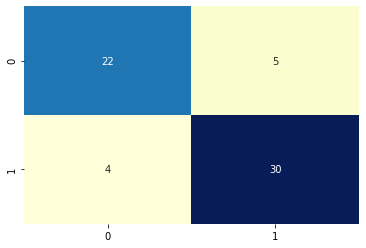

In [87]:
# Create svm
from sklearn.svm import SVC
svm = SVC(C=1, kernel='rbf', random_state=1)
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
accuracies = {}
svm_cm = confusion_matrix(y_test,svm_pred)
sns.heatmap(svm_cm,annot=True,cmap="YlGnBu",fmt="d",cbar=False)
svm_ac = svm.score(X_test, y_test)
accuracies['SVM'] = svm_ac
print('SVM_accuracy:', svm_ac)
plt.show()

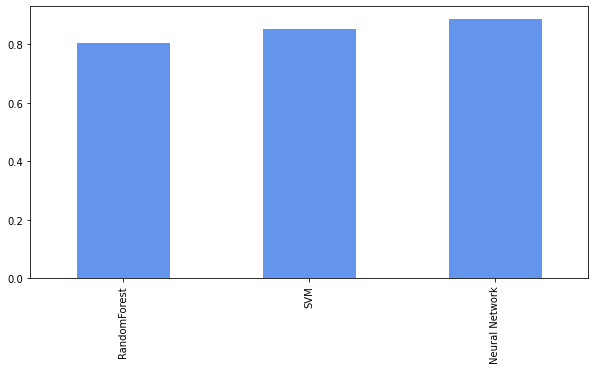

In [88]:
# model accuracy
model_accuracy = pd.Series(data=[rdf_ac, nn_ac, svm_ac], index=['RandomForest', 'Neural Network', 'SVM'])
# fig= plt.figure(figsize=(10,5))
model_accuracy.sort_values().plot(kind='bar',figsize=(10,5),color='cornflowerblue')
plt.show()